In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [4]:
long_df = pd.read_csv('long_original.csv')
final_data = pd.read_csv('final_data.csv')
wellcleaned_data = pd.read_csv('Final_wellcleaned.csv')

In [5]:
final_data = final_data .drop('MARITAL_STATUS_ALL_YEAR', axis = 1)
final_data

,Child_BIRTHS_ALL_YEAR,RESID_STATE,AGE,EMPLOYMENT,EDUC_LEVEL,YEAR,marriage_dummies,treatment,women_LFP,post,post_treatment
0,0,26,11,0,0,1,0,1,0,0,0
1,0,26,12,0,0,1,0,1,0,0,0
2,1,26,14,0,0,1,1,1,0,0,0
3,0,26,11,0,0,1,1,1,0,0,0
4,0,26,8,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3734,0,24,22,3,13,19,0,0,0,1,0
3735,2,48,21,3,12,19,0,1,0,1,1
3736,2,48,20,6,12,19,0,1,0,1,1
3737,0,24,19,3,12,19,0,0,0,1,0


In [6]:
final_data['EDUC_LEVEL'] = final_data['EDUC_LEVEL'].replace(99, 0)
final_data['EDUC_LEVEL'] = final_data['EDUC_LEVEL'].replace(98, 0)

In [7]:
final_data.columns

Index(['Child_BIRTHS_ALL_YEAR', 'RESID_STATE', 'AGE', 'EMPLOYMENT',
       'EDUC_LEVEL', 'YEAR', 'marriage_dummies', 'treatment', 'women_LFP',
       'post', 'post_treatment'],
      dtype='object')

In [8]:
final_data.rename(columns={'# Child_BIRTHS_ALL_YEAR': 'Child_BIRTHS'})

,Child_BIRTHS_ALL_YEAR,RESID_STATE,AGE,EMPLOYMENT,EDUC_LEVEL,YEAR,marriage_dummies,treatment,women_LFP,post,post_treatment
0,0,26,11,0,0,1,0,1,0,0,0
1,0,26,12,0,0,1,0,1,0,0,0
2,1,26,14,0,0,1,1,1,0,0,0
3,0,26,11,0,0,1,1,1,0,0,0
4,0,26,8,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3734,0,24,22,3,13,19,0,0,0,1,0
3735,2,48,21,3,12,19,0,1,0,1,1
3736,2,48,20,6,12,19,0,1,0,1,1
3737,0,24,19,3,12,19,0,0,0,1,0


In [9]:
cat_columns = ['YEAR','treatment', 'post', 'RESID_STATE', 'marriage_dummies', 'women_LFP', 'post_treatment']
non_cat_columns = [col for col in final_data.columns if col not in cat_columns]

non_cat_summary = final_data[non_cat_columns].describe()

In [10]:
print(non_cat_summary)

       Child_BIRTHS_ALL_YEAR          AGE   EMPLOYMENT   EDUC_LEVEL
count            3739.000000  3739.000000  3739.000000  3739.000000
mean                0.672105    14.981011     1.636801     5.585451
std                 1.102310     6.224609     2.550232     6.203251
min                 0.000000     0.000000     0.000000     0.000000
25%                 0.000000    11.000000     0.000000     0.000000
50%                 0.000000    16.000000     0.000000     0.000000
75%                 1.000000    20.000000     1.000000    12.000000
max                 8.000000    25.000000     9.000000    17.000000


In [11]:
# Reset the index and give the index a name
non_cat_summary = non_cat_summary.reset_index().rename(columns={'index': 'Year'})

# Generate the LaTeX table
latex_table = non_cat_summary.to_latex(index=False, float_format="%.2f", caption="Summary Statistics for Non-Categorial Data", label="tab:Non-Categorial Data")

# Save the generated LaTeX table to a file
with open("Non-Categorial_Data_table.tex", "w") as f:
    f.write(latex_table)

# Print the LaTeX table
print(latex_table)

\begin{table}
\centering
\caption{Summary Statistics for Non-Categorial Data}
\label{tab:Non-Categorial Data}
\begin{tabular}{lrrrr}
\toprule
 Year &  Child\_BIRTHS\_ALL\_YEAR &     AGE &  EMPLOYMENT &  EDUC\_LEVEL \\
\midrule
count &                3739.00 & 3739.00 &     3739.00 &     3739.00 \\
 mean &                   0.67 &   14.98 &        1.64 &        5.59 \\
  std &                   1.10 &    6.22 &        2.55 &        6.20 \\
  min &                   0.00 &    0.00 &        0.00 &        0.00 \\
  25\% &                   0.00 &   11.00 &        0.00 &        0.00 \\
  50\% &                   0.00 &   16.00 &        0.00 &        0.00 \\
  75\% &                   1.00 &   20.00 &        1.00 &       12.00 \\
  max &                   8.00 &   25.00 &        9.00 &       17.00 \\
\bottomrule
\end{tabular}
\end{table}



In [12]:
#cat_summary = {}
for col in cat_columns:
    #cat_summary[col] = final_data[col].value_counts()
    
    frequency_counts = final_data[col].value_counts(dropna=False)
    proportions = final_data[col].value_counts(normalize=True)
    summary_table = pd.DataFrame({'Frequency': frequency_counts, 'Proportion': proportions})
    print(col,':')
    print(summary_table) #Frequency counts for marriage status
#cat_summary = pd.DataFrame(cat_summary)



YEAR :
    Frequency  Proportion
7         442    0.118213
9         435    0.116341
1         433    0.115806
5         433    0.115806
3         425    0.113667
11        416    0.111260
13        359    0.096015
15        329    0.087991
17        269    0.071944
19        198    0.052955
treatment :
   Frequency  Proportion
1       3073    0.821878
0        666    0.178122
post :
   Frequency  Proportion
0       3541    0.947045
1        198    0.052955
RESID_STATE :
    Frequency  Proportion
48       1370    0.366408
26       1092    0.292057
24        666    0.178122
25        343    0.091736
49        149    0.039850
40        119    0.031827
marriage_dummies :
   Frequency  Proportion
0       3107    0.830971
1        632    0.169029
women_LFP :
   Frequency  Proportion
0       2918    0.780423
1        821    0.219577
post_treatment :
   Frequency  Proportion
0       3578     0.95694
1        161     0.04306


In [13]:
for col in cat_columns:
    
    frequency_counts = final_data[col].value_counts(dropna=False)
    proportions = final_data[col].value_counts(normalize=True)
    summary_table = pd.DataFrame({'Frequency': frequency_counts, 'Proportion': proportions})
    
    #latex output
    summary_table = summary_table.reset_index().rename(columns={'index': 'Year'})
    latex_table = summary_table.to_latex(index=False, float_format="%.2f", caption=f"Summary Statistics for Categorial Data, 2001 - 2019 ({col})", label=col)
    
    with open("Categorial_Data_table.tex", "w") as f:
        f.write(latex_table)

    # Print the LaTeX table
    print(latex_table)



\begin{table}
\centering
\caption{Summary Statistics for Categorial Data, 2001 - 2019 (YEAR)}
\label{YEAR}
\begin{tabular}{rrr}
\toprule
 Year &  Frequency &  Proportion \\
\midrule
    7 &        442 &        0.12 \\
    9 &        435 &        0.12 \\
    1 &        433 &        0.12 \\
    5 &        433 &        0.12 \\
    3 &        425 &        0.11 \\
   11 &        416 &        0.11 \\
   13 &        359 &        0.10 \\
   15 &        329 &        0.09 \\
   17 &        269 &        0.07 \\
   19 &        198 &        0.05 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{Summary Statistics for Categorial Data, 2001 - 2019 (treatment)}
\label{treatment}
\begin{tabular}{rrr}
\toprule
 Year &  Frequency &  Proportion \\
\midrule
    1 &       3073 &        0.82 \\
    0 &        666 &        0.18 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{Summary Statistics for Categorial Data, 2001 - 2019 (post)}
\label{post}
\begin{ta

In [14]:
# Reset the index and give the index a name
summary_table_state = summary_table_state.reset_index().rename(columns={'index': 'Frequency Counts by State'})

# Generate the LaTeX table
latex_table = summary_table_state.to_latex(index=False, float_format="%.2f", caption="Summary Statistics for Frequency Counts by State", label="tab:state")

# Save the generated LaTeX table to a file
with open("state_table.tex", "w") as f:
    f.write(latex_table)

# Print the LaTeX table
print(latex_table)

NameError: name 'summary_table_state' is not defined

In [15]:
long_df = long_df.rename(columns={'# Child_BIRTHS_ALL_YEAR': 'Child_BIRTHS', 'MARITAL_STATUS_ALL_YEAR': 'MARITAL_STATUS'})

In [16]:
long_df 

,Child_BIRTHS,MARITAL_STATUS,RESID_STATE,AGE,EMPLOYMENT,EDUC_LEVEL,YEAR
0,0,1,47,14,0,0,1
1,3,4,47,10,0,0,1
2,0,4,47,8,0,0,1
3,4,1,47,17,7,10,1
4,2,1,47,16,7,10,1
...,...,...,...,...,...,...,...
24305,0,2,24,19,3,12,19
24306,2,2,0,0,0,0,19
24307,0,2,48,27,1,12,19
24308,0,2,48,22,1,11,19


In [17]:
long_df['EDUC_LEVEL']=long_df['EDUC_LEVEL'].replace(99,0)
long_df['EDUC_LEVEL']=long_df['EDUC_LEVEL'].replace(98,0)

In [18]:
summary_columns = [long_df['Child_BIRTHS'], long_df['AGE'], long_df['EDUC_LEVEL']]
concat_summary = pd.concat(summary_columns, axis=1)
concat_summary

,Child_BIRTHS,AGE,EDUC_LEVEL
0,0,14,0
1,3,10,0
2,0,8,0
3,4,17,10
4,2,16,10
...,...,...,...
24305,0,19,12
24306,2,0,0
24307,0,27,12
24308,0,22,11


In [19]:
summary_stats = concat_summary.describe(include='all')

In [20]:
print(summary_stats)

       Child_BIRTHS           AGE    EDUC_LEVEL
count  24310.000000  24310.000000  24310.000000
mean       0.698478     15.718223      6.200658
std        1.118284      8.358818      6.513220
min        0.000000      0.000000      0.000000
25%        0.000000     10.000000      0.000000
50%        0.000000     16.000000      0.000000
75%        1.000000     22.000000     12.000000
max        8.000000     35.000000     17.000000


In [21]:
freq_columns = [long_df['MARITAL_STATUS'], long_df['RESID_STATE'], long_df['EDUC_LEVEL']]
concat_freq = pd.concat(freq_columns, axis=1)
concat_freq

,MARITAL_STATUS,RESID_STATE,EDUC_LEVEL
0,1,47,0
1,4,47,0
2,4,47,0
3,1,47,10
4,1,47,10
...,...,...,...
24305,2,24,12
24306,2,0,0
24307,2,48,12
24308,2,48,11


In [22]:
frequency_counts_marriage = concat_freq['MARITAL_STATUS'].value_counts(dropna=False)
proportions = concat_freq['MARITAL_STATUS'].value_counts(normalize=True)
summary_table_marriage = pd.DataFrame({'Frequency': frequency_counts_marriage, 'Proportion': proportions})
print(summary_table_marriage) #Frequency counts for marriage status

   Frequency  Proportion
2      18380    0.756067
1       4660    0.191691
4        740    0.030440
5        470    0.019334
0         40    0.001645
3         20    0.000823


In [23]:
frequency_counts_state = concat_freq['RESID_STATE'].value_counts(dropna=False)
proportions = concat_freq['RESID_STATE'].value_counts(normalize=True)
summary_table_state = pd.DataFrame({'Frequency': frequency_counts_state, 'Proportion': proportions})
print(summary_table_state) #Frequency counts for individual's age between 1990 - 2019

    Frequency  Proportion
6        2380    0.097902
48       1572    0.064665
0        1478    0.060798
26       1253    0.051543
28       1223    0.050309
45       1218    0.050103
37       1179    0.048499
39       1060    0.043603
42        849    0.034924
13        804    0.033073
24        786    0.032332
36        761    0.031304
51        742    0.030522
29        739    0.030399
17        705    0.029000
12        700    0.028795
18        697    0.028671
34        467    0.019210
25        403    0.016578
1         403    0.016578
8         396    0.016290
47        389    0.016002
5         328    0.013492
4         318    0.013081
41        309    0.012711
53        307    0.012629
22        303    0.012464
21        303    0.012464
19        302    0.012423
55        297    0.012217
27        255    0.010490
11        183    0.007528
49        163    0.006705
40        148    0.006088
32        128    0.005265
31        125    0.005142
20        117    0.004813
9          8

In [24]:
frequency_counts_edu = concat_freq['EDUC_LEVEL'].value_counts(dropna=False)
proportions = concat_freq['EDUC_LEVEL'].value_counts(normalize=True)
summary_table_edu = pd.DataFrame({'Frequency': frequency_counts_edu, 'Proportion': proportions})
print(summary_table_edu)

    Frequency  Proportion
0       12398    0.509996
12       3446    0.141752
11       1569    0.064541
14       1309    0.053846
16       1290    0.053065
13       1249    0.051378
10       1178    0.048457
17        667    0.027437
9         541    0.022254
15        538    0.022131
8          78    0.003209
7          23    0.000946
1          10    0.000411
6          10    0.000411
3           3    0.000123
2           1    0.000041


In [25]:
# Calculate LFP in state Nebraska, South Dakota, Wyoming, Montana, Wisconsin
States = [26, 40, 49, 25, 48, 24]

# create an empty dataframe to store results
LFP_states = pd.DataFrame()

# iterate through each state code in the list States
for state in States:
    # calculate working women for the current state
    long_df['working_women'] = long_df['EMPLOYMENT'] == 1
    long_df['current_state'] = long_df['RESID_STATE'] == state
    LFP_state = long_df.groupby(['current_state', 'YEAR'])['working_women'].mean().reset_index()
    LFP_state = LFP_state[LFP_state['current_state']]
    LFP_state['state_code'] = state
    
    # append the results to the LFP_states dataframe
    LFP_states = LFP_states.append(LFP_state, ignore_index=True)

# print the results for each state
print(LFP_states)

    current_state  YEAR  working_women  state_code
0            True     1       0.028571          26
1            True     3       0.051852          26
2            True     5       0.057143          26
3            True     7       0.174242          26
4            True     9       0.198347          26
5            True    11       0.296610          26
6            True    13       0.423729          26
7            True    15       0.586207          26
8            True    17       0.610169          26
9            True    19       0.686957          26
10           True     1       0.000000          40
11           True     3       0.230769          40
12           True     5       0.250000          40
13           True     7       0.235294          40
14           True     9       0.285714          40
15           True    11       0.470588          40
16           True    13       0.437500          40
17           True    15       0.411765          40
18           True    17       0

In [26]:
LFP_states['treatment'] = LFP_states['state_code'].apply(lambda x: 0 if x == 24 else 1)
LFP_states

,current_state,YEAR,working_women,state_code,treatment
0,True,1,0.028571,26,1
1,True,3,0.051852,26,1
2,True,5,0.057143,26,1
3,True,7,0.174242,26,1
4,True,9,0.198347,26,1
5,True,11,0.296610,26,1
6,True,13,0.423729,26,1
7,True,15,0.586207,26,1
8,True,17,0.610169,26,1
9,True,19,0.686957,26,1


NameError: name 'state_data' is not defined

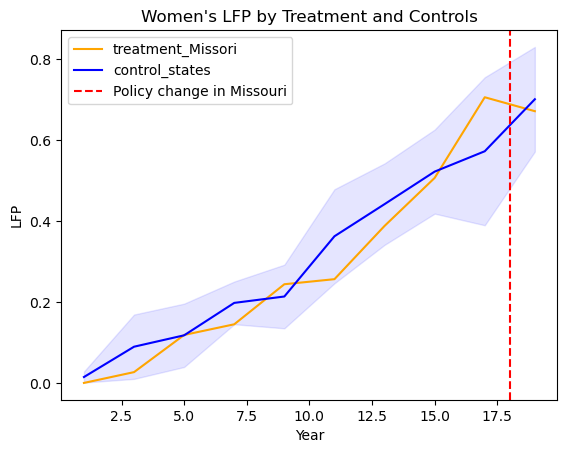

In [27]:
#Checking for parallel trends by treatment and control groups
fig, ax = plt.subplots()

treatment_state = LFP_states[LFP_states['treatment']==0]
control_states = LFP_states[LFP_states['treatment']==1]

treatment_state_avg = treatment_state.groupby('YEAR')['working_women'].mean().reset_index()
treatment_std = treatment_state.groupby('YEAR')['working_women'].std().reset_index()

control_states_avg = control_states.groupby('YEAR')['working_women'].mean().reset_index()
control_std = control_states.groupby('YEAR')['working_women'].std().reset_index()


plt.plot(treatment_state_avg['YEAR'], treatment_state_avg['working_women'], label="treatment_Missori", color = "orange")
plt.plot(control_states_avg['YEAR'], control_states_avg['working_women'], label="control_states", color = "blue")

# Add shading for treatment and control group averages
plt.fill_between(treatment_state_avg['YEAR'], 
                 treatment_state_avg['working_women'] - treatment_std['working_women'],
                 treatment_state_avg['working_women'] + treatment_std['working_women'],
                 color='orange', alpha=0.1)

plt.fill_between(control_states_avg['YEAR'], 
                 control_states_avg['working_women'] - control_std['working_women'],
                 control_states_avg['working_women'] + control_std['working_women'],
                 color='blue', alpha=0.1)

plt.xlabel('Year')
plt.ylabel('LFP')
plt.title("Women's LFP by Treatment and Controls")
plt.axvline(x=18, linestyle='--', color='red', label="Policy change in Missouri")
plt.legend()

ax.xaxis.set_major_locator(FixedLocator(state_data['YEAR'].values))
ax.xaxis.set_major_formatter(FixedFormatter([2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019]))

treatment_counts = treatment_state.groupby('YEAR')['working_women'].count()
control_counts = control_states.groupby('YEAR')['working_women'].count()

print("Treatment group counts by year:")
print(treatment_counts)
print("\nControl group counts by year:")
print(control_counts)

plt.show()

#get std error and plot 95% confidence intervals std/sqrt(sample)

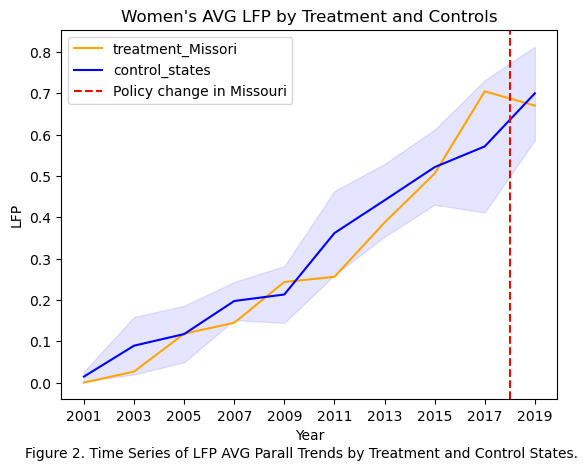

In [28]:
# Calculate standard error
treatment_se = treatment_std['working_women'] / np.sqrt(treatment_state.groupby('YEAR')['working_women'].count().values)
control_se = control_std['working_women'] / np.sqrt(control_states.groupby('YEAR')['working_women'].count().values)

# Calculate the 95% confidence intervals
ci_treatment = 1.96 * treatment_se
ci_control = 1.96 * control_se

# Plotting
fig, ax = plt.subplots()

plt.plot(treatment_state_avg['YEAR'], treatment_state_avg['working_women'], label="treatment_Missori", color="orange")
plt.plot(control_states_avg['YEAR'], control_states_avg['working_women'], label="control_states", color="blue")

# Add shading for treatment and control group averages
plt.fill_between(treatment_state_avg['YEAR'], 
                 treatment_state_avg['working_women'] - ci_treatment,
                 treatment_state_avg['working_women'] + ci_treatment,
                 color='orange', alpha=0.1)

plt.fill_between(control_states_avg['YEAR'], 
                 control_states_avg['working_women'] - ci_control,
                 control_states_avg['working_women'] + ci_control,
                 color='blue', alpha=0.1)

plt.xlabel('Year')
plt.ylabel('LFP')
plt.title("Women's AVG LFP by Treatment and Controls")
plt.axvline(x=18, linestyle='--', color='red', label="Policy change in Missouri")
plt.legend()

ax.xaxis.set_major_locator(FixedLocator(treatment_state_avg['YEAR'].values))
ax.xaxis.set_major_formatter(FixedFormatter([2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019]))
caption = 'Figure 2. Time Series of LFP AVG Parall Trends by Treatment and Control States.'
fig.text(0.5, -0.01, caption, ha='center')

plt.show()

In [29]:
fig = ax.get_figure()
fig.savefig('output.png')

In [30]:
treatment_state_avg['working_women'] - ci_treatment

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: working_women, dtype: float64

In [ ]:
control_states

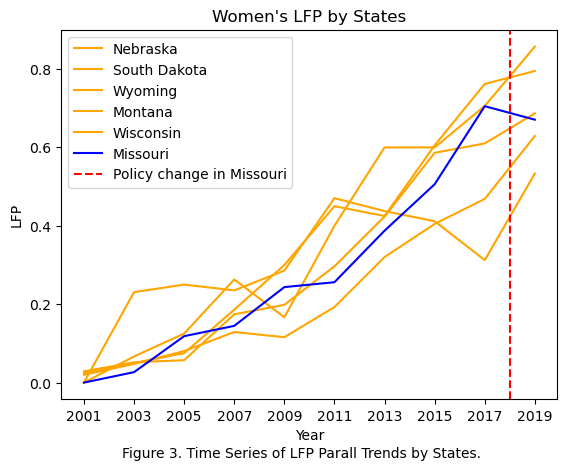

         YEAR  working_women  state_code  treatment
0   10.000000      10.000000        10.0       10.0
1   10.000000       0.311383        26.0        1.0
2    6.055301       0.249946         0.0        0.0
3    1.000000       0.028571        26.0        1.0
4    5.500000       0.086418        26.0        1.0
5   10.000000       0.247479        26.0        1.0
6   14.500000       0.545587        26.0        1.0
7   19.000000       0.686957        26.0        1.0
8   10.000000      10.000000        10.0       10.0
9   10.000000       0.316746        40.0        1.0
10   6.055301       0.154193         0.0        0.0
11   1.000000       0.000000        40.0        1.0
12   5.500000       0.238971        40.0        1.0
13  10.000000       0.299107        40.0        1.0
14  14.500000       0.431066        40.0        1.0
15  19.000000       0.533333        40.0        1.0
16  10.000000      10.000000        10.0       10.0
17  10.000000       0.378452        49.0        1.0
18   6.05530

In [31]:
#Checking for parallel trends
State_names = ['Nebraska', 'South Dakota', 'Wyoming', 'Montana', 'Wisconsin', 'Missouri']
fig, ax = plt.subplots()
LFP_states_des = pd.DataFrame()

for state, names in zip(States, State_names):
    state_data = LFP_states[LFP_states['state_code'] == state]
    state_working_women = state_data['working_women']
    LFP_states_des = LFP_states_des.append(state_data.describe(), ignore_index=True) 
    #summar_statsstate_data.agg['mean', 'std']
    if state != 24:
        plt.plot(state_data['YEAR'], state_data['working_women'], label=names, color="orange")
    else:
        plt.plot(state_data['YEAR'], state_data['working_women'], label=names, color="blue")
        
plt.xlabel('Year')
plt.ylabel('LFP')
plt.title("Women's LFP by States")
plt.axvline(x=18, linestyle='--', color='red', label="Policy change in Missouri")
plt.legend()

ax.xaxis.set_major_locator(FixedLocator(state_data['YEAR'].values))
ax.xaxis.set_major_formatter(FixedFormatter([2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019]))

caption = 'Figure 3. Time Series of LFP Parall Trends by States.'
fig.text(0.5, -0.01, caption, ha='center')
plt.show()
print(LFP_states_des)
#mean, std, percentire

In [ ]:
#SD (40), MT(49), WY(25) # Summary comparision seems alright

In [ ]:
LFP_states.to_csv('LFP_states.csv', index=False)